In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from articulate import articulate
from omegaconf import OmegaConf
from dotenv import load_dotenv
from articulate_anything.utils.viz import (
    show_video, 
    display_code, 
    show_videos, 
    display_codes,
    show_images,
    get_frames_from_video,
)
from articulate_anything.utils.utils import load_config, join_path
from articulate_anything.utils.cotracker_utils import make_cotracker
from PIL import Image
import json

In [13]:
import os
os.chdir("..")

In [14]:


API_KEY = "YOUR-ACTUAL-API-KEY"
## we have our API key stored in a .env file
## Comment the `load_dotenv` and `os.environ.get` lines if you just want to use
## your API key directly
load_dotenv()
API_KEY = os.environ.get('API_KEY')

task = "suitcase"

Let's first take a look at the ground-truth video

Let's extract the first frame from the video and use that as the image prompt

We can annotate the motion in the video using Cotracker

In [15]:

cfg = load_config("../../conf")

/localhome/efa33/miniconda3/envs/artiverse/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


Before starting articulation, please make sure that the dataset is preprocessed by running

   ```bash
   python articulate_anything/preprocess/preprocess_partnet.py parallel={int} modality={image}
   ```
This renders a front-view image for each object in the PartNet-Mobility dataset. This is necessary for our mesh retrieval as we will compare the visual similarity between the input image or video against each rendered template object.

In [16]:
modality = "image"
prompt = "/cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3/imgs/18.png"

Note: currently Gemini does not support multi-modal prompt finetuning. We have to use few-shot prompting instead. It's important to pick the examples with some care for your use case.

In [17]:
cfg = load_config()
cfg.prompt = prompt
cfg.modality = modality
cfg.out_dir = join_path("results", modality, task)



use_cotracker = False # {True, False}
mode = "image"
actor_prompting_type = "basic" # {basic, incontext}
critic_prompting_type = "incontext" # {basic, incontext}

cfg.joint_actor.mode = mode
cfg.joint_actor.use_cotracker = use_cotracker
cfg.joint_actor.type = actor_prompting_type
cfg.joint_actor.targetted_affordance = False

cfg.joint_actor.examples_dir = "datasets/multi_modal_incontext_examples/joint_actor/in_context_actor_examples_datasets" ## Put your examples here


cfg.joint_critic.mode = mode
cfg.joint_critic.use_cotracker = use_cotracker
cfg.joint_critic.type = critic_prompting_type

cfg.joint_critic.examples_dir = "datasets/multi_modal_incontext_examples/joint_critic/in_context_examples_datasets" ## Put your examples here

cfg.actor_critic.actor_only = True

## important to set correctly for the joint_critic to works properly
## this should have the same direction as the ground-truth video
cfg.simulator.flip_video = False ## flip time for suitcase
cfg.simulator.ray_tracing=False
cfg.simulator.floor_texture = "plain"


# cfg.category_selector.topk = 3
cfg.category_selector.topk = 1 ## how many top categories should we search for an object template match
# this is because PartNet-Mobility dataset categories labels are sparse and sometimes not great


cfg.obj_selector.frame_index = 0

cfg.actor_critic.max_iter = 2
cfg.model_name = "gpt-4o-2024-11-20"


cfg.api_key = API_KEY ## loaded from .env file

In [ ]:
print(os.getcwd())

In [22]:
steps = articulate(cfg)

INFO:root:Setting seed 0
INFO:root:Starting Mesh Retrieval
INFO:root:CategorySelector: Prediction already exists. Skipping generation.


obj_categories ['door']
candidate_obj_ids ['door/fpModel-4823-4', 'door/3dw-ac04097ee2b5876a7d831f06820aa95', 'door/3dw-980b8bf2d344097b93f4cf549f69b9a8', 'door/fpModel-b95dcd6f1220289c38ffc043072031f1802e4e85', 'door/texverse-e9f9bad60c5746ed86d130795ed8ac1d_1024', 'door/3dw-d01578b2624462c7b63a61619818b168', 'door/objaverse-6efd95dba8ec4046bb655418d349a60f', 'door/fpModel-732069dfadee69978fa6db9d3ac9c2c8ce5e7b56', 'door/fpModel-210-0', 'door/3dw-980681e245e8484665f721fc4ae1d2c7', 'door/texverse-0adfe9b20dd0478eab58416766bb2346_1024', 'door/3dw-3d401aa9b62051c5275d003e423c59ba', 'door/3dw-322d51ba912154606a44fdd49dec8069', 'door/3dw-e6a56c7f6f610a09765ee729adbdf968', 'door/3dw-b75b4c9ad3d02d05d7ffe06e3f59dccf', 'door/3dw-e7d24d0dc0cb5eddb475f154e02a2343', 'door/objaverse_xl-64632c715876b302d0a307ae38ab33ce5c5da41143fee36f564b6978269e3762', 'door/objaverse-f11f685342c447ec8fa86025ea4f706b', 'door/objaverse-39704aa9a9bb4ee9b31b405895db67aa', 'door/3dw-1295cec4b330cc70f184b7305dc80f27', 

INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selector/round_0_0/object_selector_result.json. Skipping generation.
INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selector/round_0_10/object_selector_result.json. Skipping generation.
INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selector/round_0_20/object_selector_result.json. Skipping generation.
INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selector/round_0_30/object_selector_result.json. Skipping generation.
INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selector/round_0_40/object_selector_result.json. Skipping generation.
INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selector/round_0_50/object_selector_result.json. Skipping generation.
INFO:root:ObjectSelector: Prediction already exists at results/image/suitcase/obj_selecto

------------- /cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered
process_visual: /cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered
/cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3
['conda', 'run', '-n', 'articulate_anything', 'python', 'articulate_anything/physics/sapien_simulate.py', 'name=sapien', 'camera_params.width=640', 'camera_params.height=480', 'camera_params.views.frontview.cam_pos=[3, 1.5, 2]', 'camera_params.views.frontview.look_at=[0, 0, 0.8]', 'floor_texture=plain', 'use_segmentation=False', 'object_white=True', 'ray_tracing=False', 'headless=True', 'flip_video=False', 'simulation_params.stationary_or_move=stationary', 'simulation_params.num_steps=50', 'simulation_params.joint_name=all', 'simulation_params.joint_move_dir=auto', 'urdf.file=/cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3/mobility.urdf', 'urdf.raise_distance_offset=0', 'urdf.r

python: can't open file '/local-scratch/localhome/efa33/projects/articulate_anything/physics/sapien_simulate.py': [Errno 2] No such file or directory

ERROR conda.cli.main_run:execute(127): `conda run python articulate_anything/physics/sapien_simulate.py name=sapien camera_params.width=640 camera_params.height=480 camera_params.views.frontview.cam_pos=[3, 1.5, 2] camera_params.views.frontview.look_at=[0, 0, 0.8] floor_texture=plain use_segmentation=False object_white=True ray_tracing=False headless=True flip_video=False simulation_params.stationary_or_move=stationary simulation_params.num_steps=50 simulation_params.joint_name=all simulation_params.joint_move_dir=auto urdf.file=/cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3/mobility.urdf urdf.raise_distance_offset=0 urdf.rotation_pose.rx=0 urdf.rotation_pose.ry=0 urdf.rotation_pose.rz=0 engine.timestep=0.01 lighting.ambient=[0.5, 0.5, 0.5] lighting.directional.direction=[0, 1, -1]

/cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3/link_summary.txt
Preprocessing PartNet object: door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3
/cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered
****OBJ_DIR: /cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3
234452345234 /cs/3dlg-jupiter-project/artiverse/singapo_data_full_filtered/door/3dw-11a7fc3b46b0508ba5c716f57b4a74c3


## Mesh Retrieval

Let's inspect the steps starting with the mesh retrieval

In [19]:
mesh_retrieval = steps["Mesh Retrieval"]

In [20]:
mesh_retrieval["Category Selection"].load_prediction()

KeyError: 'Category Selection'

In [ ]:
obj_selector = mesh_retrieval["Object Selection"]
obj_selector.load_prediction()

{'selected_image': 'Image 15',
 'obj_ids': ['100248', '101051', '103770'],
 'obj_id': '101051'}

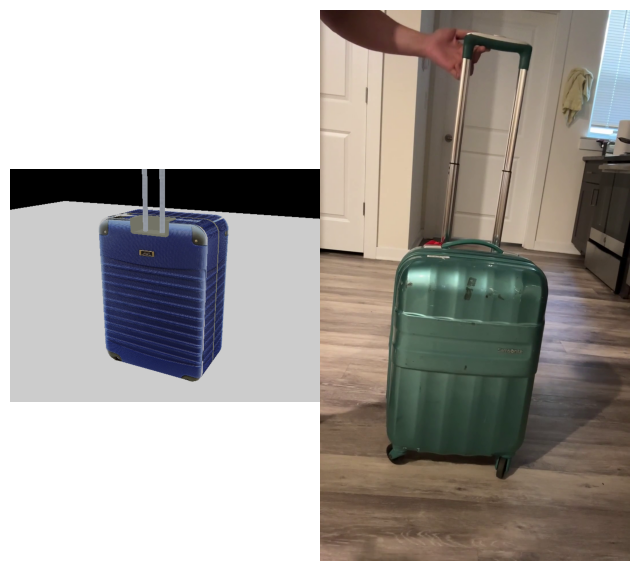

In [ ]:
obj_selector.load_predicted_rendering()

## Link Placement

In [ ]:
link_art = steps["Link Articulation"]
link_actors = link_art["Link actor"]
link_critics = link_art["Link critic"]
assert len(link_actors) == len(link_critics)
print(f"Link placement runs for {len(link_actors)} iteration(s)")

Link placement runs for 1 iteration(s)


In [ ]:
link_codes = [link_actor.load_prediction() for link_actor in link_actors]

link_preds = [link_actor.load_predicted_rendering() for link_actor in link_actors]

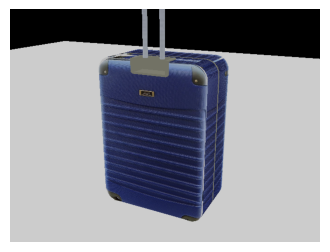

╷  
                                                                  │  
╶─────────────────────────────────────────────────────────────────┼─╴
 from articulate_anything.api.odio_urdf import *                  │  
                                                                  │  
 def partnet_101051(input_dir, links):                            │  
     """                                                          │  
     No. masked_links: 7                                          │  
     Robot Link Summary:                                          │  
     - base                                                       │  
     - handle                                                     │  
     - wheel                                                      │  
     - wheel_2                                                    │  
     - wheel_3                                                    │  
     - wheel_4                                                    │  
     - suitcase_body                                              │  
                                                                  │  
     Object: a suitcase with wheels and a handle                  │  
     """                                                          │  
     pred_robot = Robot(input_dir=input_dir, name="suitcase")     │  
     pred_robot.add_link(links['base'])                           │  
     pred_robot.add_link(links['suitcase_body'])                  │  
     pred_robot.add_joint(Joint("base_to_suitcase_body",          │  
                          Parent("base"),                         │  
                          Child("suitcase_body"),                 │  
                          type="fixed"),                          │  
                          )                                       │  
     pred_robot.add_link(links['handle'])                         │  
     pred_robot.place_relative_to('handle', 'suitcase_body',      │  
                                  placement="above",              │  
                                  clearance=0.0)                  │  
                                                                  │  
     wheel_links = ['wheel', 'wheel_2', 'wheel_3', 'wheel_4']     │  
     for wheel_link in wheel_links:                               │  
         pred_robot.add_link(links[wheel_link])                   │  
         pred_robot.place_relative_to(wheel_link, 'suitcase_body',│  
                                      placement="below",          │  
                                      clearance=0.0)              │  
                                                                  │  
     return pred_robot                                            │  
                                                                  ╵

In [ ]:
show_images(link_preds)
display_codes(link_codes)

Note: 
1. some object part names need relabeling because PartNet-Mobility part labeling is not great. For example, a lid's pump rod would be labeled as `lid` or a door knob would be labeled as `door`. **solution**: gemini annotation based on mesh images + maybe some manual relabeling. This is done automatically by the `preprocess_partnet.py` script.
2. Some meshes are also not "clean" so there would be floating points in the air that affect our collision detection algorithm  and thus our link placement but might not immediate visible to the eye. **solution**: use [open3d](https://www.open3d.org/docs/release/tutorial/geometry/mesh.html#Connected-components) to clean up the meshes.

## Joint Prediction

In [ ]:
joint_art = steps["Joint Articulation"]
joint_actors = joint_art["Joint actor"]


print(f"Joint prediction runs for {len(joint_actors)} iteration(s)")

Joint prediction runs for 1 iteration(s)


In [ ]:
joint_codes = [joint_actor.load_prediction() for joint_actor in joint_actors]
joint_preds = [joint_actor.load_predicted_rendering() for joint_actor in joint_actors]


BEFORE FILTER VIDEO ['video_suitcase_body_to_handle_frontview.mp4', 'video_suitcase_body_to_wheel_frontview.mp4', 'video_suitcase_body_to_wheel_4_frontview.mp4', 'video_suitcase_body_to_wheel_2_frontview.mp4', 'video_suitcase_body_to_wheel_3_frontview.mp4']


/home/vlongle/miniconda3/envs/articulate-anything-release/lib/python3.9/site-packages/cotracker/models/build_cotracker.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

Video saved to ./results/image/suitcase/joint_actor/iter_0/seed_0/aug_video_suitcase_body_to_handle_frontview.mp4



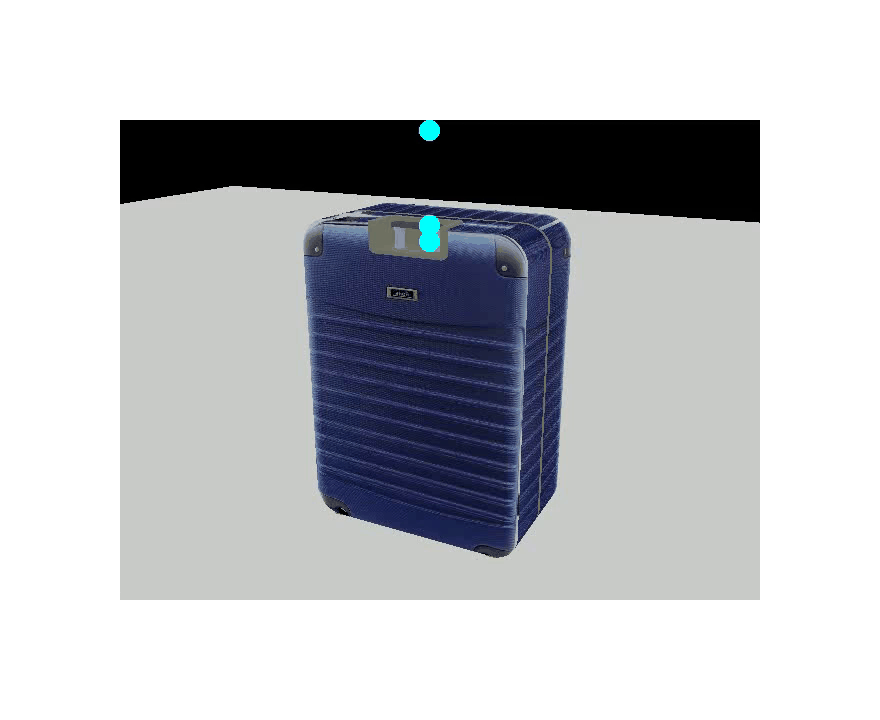

╷ 
                                                                                                                │ 
╶───────────────────────────────────────────────────────────────────────────────────────────────────────────────┼╴
 from articulate_anything.api.odio_urdf import *                                                                │ 
                                                                                                                │ 
 def partnet_101051(input_dir, links):                                                                          │ 
     """                                                                                                        │ 
     No. masked_links: 7                                                                                        │ 
     Robot Link Summary:                                                                                        │ 
     - base                                                                                                     │ 
     - handle                                                                                                   │ 
     - wheel                                                                                                    │ 
     - wheel_2                                                                                                  │ 
     - wheel_3                                                                                                  │ 
     - wheel_4                                                                                                  │ 
     - suitcase_body                                                                                            │ 
                                                                                                                │ 
     Object: a suitcase with wheels and a handle                                                                │ 
     """                                                                                                        │ 
     pred_robot = Robot(input_dir=input_dir, name="suitcase")                                                   │ 
     pred_robot.add_link(links['base'])                                                                         │ 
     pred_robot.add_link(links['suitcase_body'])                                                                │ 
     pred_robot.add_joint(Joint("base_to_suitcase_body",                                                        │ 
                          Parent("base"),                                                                       │ 
                          Child("suitcase_body"),                                                               │ 
                          type="fixed"),                                                                        │ 
                          )                                                                                     │ 
     pred_robot.add_link(links['handle'])                                                                       │ 
     pred_robot.place_relative_to('handle', 'suitcase_body',                                                    │ 
                                  placement="above",                                                            │ 
                                  clearance=0.0)                                                                │ 
                                                                                                                │ 
     wheel_links = ['wheel', 'wheel_2', 'wheel_3', 'wheel_4']                                                   │ 
     for wheel_link in wheel_links:                                                                             │ 
         pred_robot.add_link(links[wheel_link])                                                                 │ 
         pred_robot.place_relative_to(wheel_link, 'suitcase_body',                     

In [ ]:
show_videos(joint_preds, width=512, height=512)
display_codes(joint_codes)